In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
save_dir="logs"
name="basic_model_0"
version = 8
data = pd.read_csv(f'{save_dir}/{name}/version_{version}/metrics.csv')
data.head(2)

,epoch,step,train_loss,val_loss
0,0,885,NaN,0.005951
1,0,885,0.011732,NaN


In [3]:
# 分离训练和验证数据
train_df = data[data['train_loss'].notna()].copy()
val_df = data[data['val_loss'].notna()].copy()
# 合并训练和验证数据，基于 'epoch' 和 'step'
data = pd.merge(train_df, val_df, on=['epoch', 'step'])[['epoch', 'step', 'train_loss_x', 'val_loss_y']]
data.columns = ['epoch', 'step', 'train_loss', 'val_loss']
data.head(2)

,epoch,step,train_loss,val_loss
0,0,885,0.011732,0.005951
1,1,1771,0.004985,0.004075


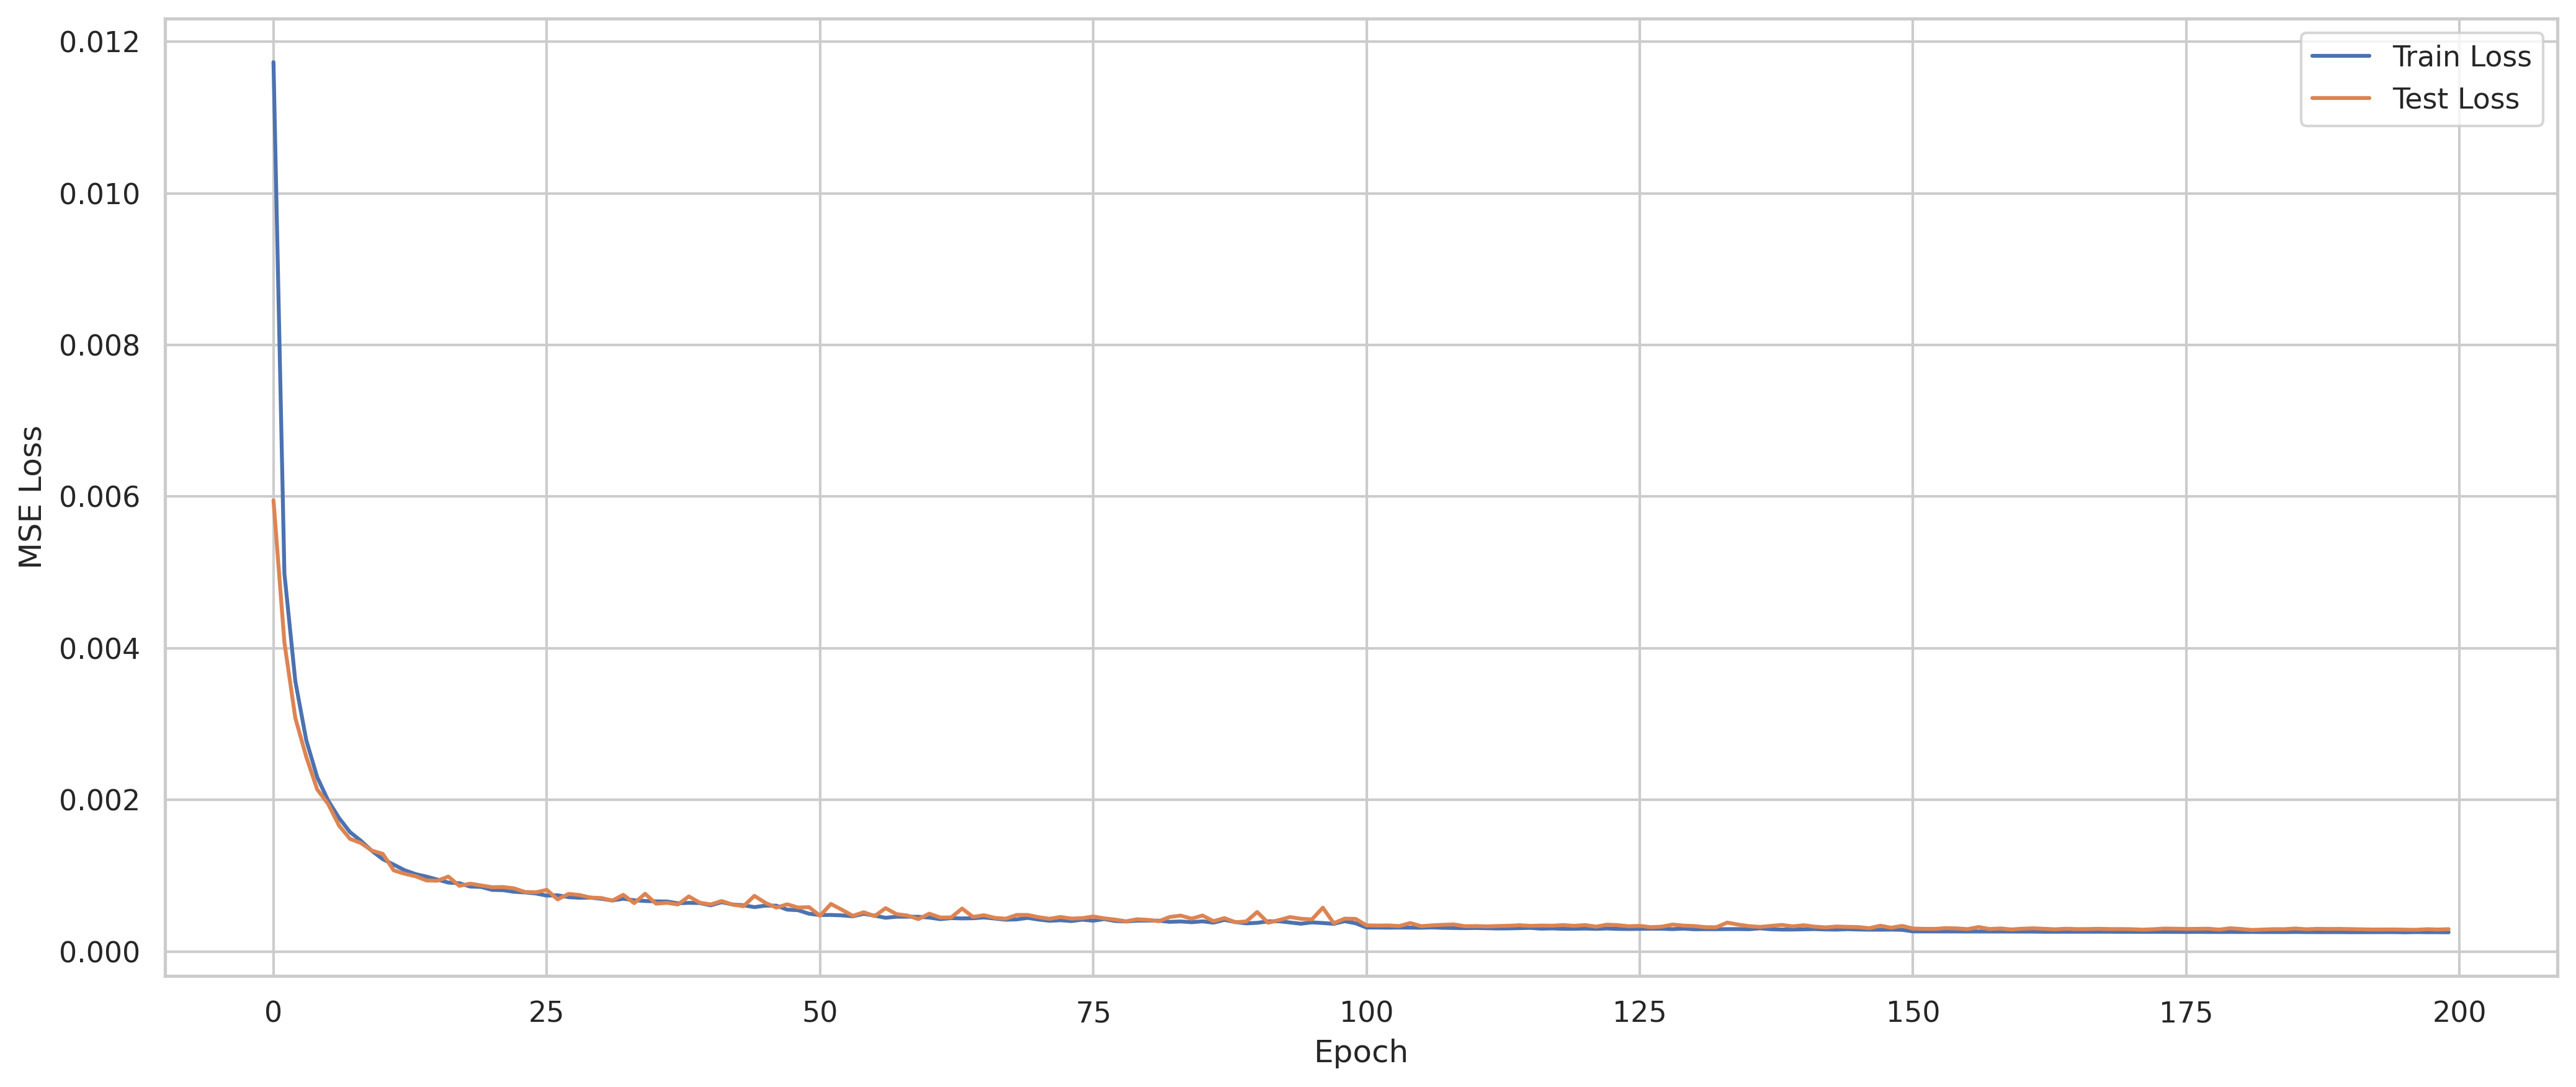

In [4]:
# 设置绘图样式
sns.set(style="whitegrid")

# 创建图形并设置大小
fig = plt.figure(figsize=(14, 6), dpi=300)

# 绘制训练和验证的 Loss 曲线
sns.lineplot(x='epoch', y='train_loss', data=data, label='Train Loss')
sns.lineplot(x='epoch', y='val_loss', data=data, label='Test Loss')
#plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()
fig.savefig('trainning_loss.pdf', dpi=300)